# Introduction to our Submission System

In this exercise you will:

- Optional: Learn how to set up Google Colab for our exercises
- Learn how to work with IPython notebooks
- Get a small numpy introduction
- Learn about our submission system

Execute a selected cell with `Shift + Enter`.

# (Optional) Set up Google Colab

If you lack resources CPU or GPU resources to finish an exercise, you can also use your google account to access [google colab](https://colab.research.google.com/) which provides an already set up python environment as well as free resources for training.

In order to use google colab follow these steps:
1. Access your [google drive](https://drive.google.com/) and upload your i2dl folder that contains the respective exercises/datasets etc. in the main directory:

<img name="colab folder" src="https://drive.google.com/uc?id=1Y6d04S6bHII2QoY-7xJZIX2HH7lbHvIj">

2. Open the exercise folder and select the notebook you want to open in google colab:

<img name="colab start notebook" src="https://drive.google.com/uc?id=1vKrOJF1jTtIjEhkjgi2dmy3BYZcD9SZV">

3. Uncomment (remove the two '"""'s) and execute the cell below to mount your gdrive folder. You have to allow google colab to access your folder in the pop up box and sign in to your account once more
4. Done, the notebook is now ready to be used with google colab and you can start executing cells from the top of the notebook as desired:

<img name="colab_done.png" src="https://drive.google.com/uc?id=166lsxtl_njQ-Vl1dS9HeecxqV6STXK7b">

In [25]:
!ls

1_introduction.ipynb  images  README.md
exercise_code	      models  requirements.txt


## (Optional) Mount folder in Colab

Uncomment thefollowing cell to mount your gdrive if you are using the notebook in google colab:

In [26]:

from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/I2DL/exercise_01'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['.ipynb_checkpoints', '1_introduction.ipynb', 'README.md', 'exercise_code', 'images', 'models', 'requirements.txt']


## 1. IPython Notebooks
An IPython notebook is made up of a number of cells. Each cell can contain Python code. You can execute a cell by clicking on it and pressing `Shift-Enter`. When you do so, the code in the cell will be executed, and the output of the cell will be displayed beneath the cell. For example, after running the first cell the notebook looks like this:

In [27]:
x = 5
print(x+3)

8


Global variables are shared between cells. Therefore, we can access `x` in the next cell.

In [28]:
print(x+10)

15


By convention, IPython notebooks are expected to be run from top to bottom. Failing to execute some cells or executing cells out of order can result in errors:

In [29]:
# This does not work
print(x+y)

[[10 11]
 [12 13]]


In [30]:
# After executing this cell, you can re-evaluate the cell above
y = 3

You can edit cells by double clicking them (the color on the left changes from blue to green) and change the text (not really useful) or code (will be useful).

In [31]:
print('I have not changed the cell')

I have not changed the cell


Please make sure that you are using the correct python environment. You can print out the environment path with the following cell. If you use python2 to work on the exercises and submit your model, you will encounter errors.

In [32]:
import sys
print(sys.version)
if sys.version_info <= (3, 7):
    print("you are using an older version of python. We expect python 3.7.x \nYou can continue with your version but it might cause some issues")

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


After you have modified an IPython notebook for one of the assignments by modifying or executing some of its cells, remember to __save your changes__!


## 2. Imports

We start every notebook with a cell containg the important imports. So the first cell of every notebook is the import cell, as this needs to be executed before running any code.


In [33]:
import time
import os
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 3. Numpy Introduction

Numpy is a high performance framework for operations on multi dimensional arrays. It would be a nice tool in your kitty for working on later exercises and your life as a Data Scientist in general. 

In [34]:
# Create a simple (2, 3) numpy array
# [[ 1  2  3]
#  [ 4  5  6]]
a = np.array([[1,2,3], [4,5,6]])

# Print the data type of this array
print(a.dtype)

# print the shape of this array
print(a.shape)

int64
(2, 3)


In [35]:
# Slicing operation 
# Let us take the first two columns from the original array and save it in a new one
b = a[:, :2]
print(b)
print(b.shape)

[[1 2]
 [4 5]]
(2, 2)


In [36]:
# Select elements which satisfy a condition
# Using numpy array makes such a selection trivial
mask = a > 1
new_array = a[mask]
new_array

array([2, 3, 4, 5, 6])

In [37]:
# Do the same thing in a single step
c = a[a>1]
assert np.all(new_array == c) #  np.all() to indicate that all the values need to match

In [38]:
# Mathematical operations
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]
[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [39]:
# Element wise operations
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

# Element wise exponential operation
#[[ 2.71828183  7.3890561 ]
#  [20.08553692 54.59815003]] 
print(np.exp(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


A detailed summary of numpy is beyond the scope of this assignment. Please take a look at http://docs.scipy.org/doc/numpy/reference/ for further reference. For this exercise, the tasks we have covered should be enough.

## 4. Notebook convenience
One of the convenient things about jupyter notebooks is the ability to display images, instructions and guide your thought process. You will not have any new clanky windows opening up and everything shall be inline.

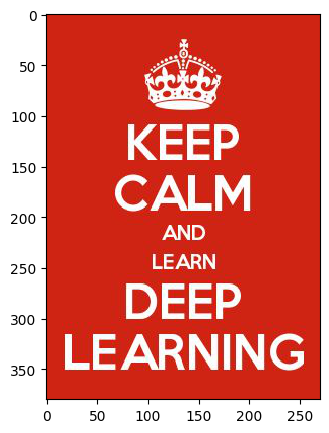

In [40]:
# Load the image first
image = Image.open('images/sample_image.jpg')
plt.imshow(image)

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Sometimes we ask inline questions. They should help you to think about the subject that are relevant for the exam.</p>
    <p>**Your answer:** You can write your answer here to save it in the ipython notebook so you can review it before the exam. Double click a cell to edit it and enter your answer.</p>
</div>

## 5. External Files
Most of your work will involve implementing certain functions in external python files. You can either open external files here in jupter notebook or edit them with your favourite text or python editor.

All files you will have to edit are contained in the `exercise_code` folder. Check out the `Dummy` class in `exercise_code/networks/dummy.py`.

In [41]:
from exercise_code.networks.dummy import Dummy
# Instantiate a "model"
model = Dummy()

## 6. Dummy Machine

Usually, we ask you to train and submit models. You don't need to train anything fancy in this exercise, this is just a sample code to familarize you with the file structure and your future tasks.

You need to make some changes to the `forward()` method in `exercise_01/exercise_code/networks/dummy.py`and set `x` to any integer that is larger than 59. We highlight all locations where you should modify the code with boxes in the respective files.

<div class="alert alert-danger">
    <h3>Warning: Don't modify code outside your assigned boxes</h3>
    <p>Make sure that you don't mutate, rename or remove classes or functions outside the respective assigned boxes!</p><p> You can add new functions if you so desire and feel the need of having them structured outside of our respective boxes but besides later exercises these shouldn't be required.</p>
</div>

In [42]:
model.forward(5)

80

In this submission you get a score depending upon the number of test cases you pass. Usually, the total points you can secure is between __0 - 100__. For this exercise, you have __one test cases__ which depends on the output of the `forward()` function. You can check the `exercise_01/exercise_code/tests` folder to have a general feel about the unit tests. Please remember that these test cases are just a sample and the submission server has a set of different test cases. 

In [43]:
from exercise_code.tests.dummy_tests import DummyTest

test_cases = DummyTest(model)
test_cases()

DummyTest passed.
The score of your dummy machine is: 80


## 7. Model Saving
Now you need to save the model. We provide you with all the functionality, so you will only need to execute the next cell.

In [44]:
model.save_model()

<div class="alert alert-danger">
    <h3>Warning</h3>
    <p>You might get an error like this:</p>
    <p>PicklingError: Can't pickle `<class 'exercise_code.test_model.TestModel'>`: it's not the same object as exercise_code.test_class.TestSubmission</p>
    <p>The reason is that we are using autoreload and working on this class during the notebook session. If you get this error simply restart the kernel and rerun the whole script (Kernel -> Restart & Run All) or only the important cells for generating your model.</p>
</div>

## 8. Zip File Creation
Run the following cell to create the zip file for submission, which contains all the exercise code, models, and ipynb notebooks.

In [46]:
from exercise_code.submit import submit_exercise

submit_exercise('../Output01/Exercise_01')

relevant folders: ['models', 'exercise_code']
notebooks files: ['1_introduction.ipynb']
Adding folder models
Adding folder exercise_code
Adding notebook 1_introduction.ipynb
Zipping successful! Zip is stored under: /content/gdrive/MyDrive/I2DL/Output01/Exercise_01.zip


# Submission Goals

- Goal: implement dummy machine 
- Threshold to this exercise: 60
- Submission start: __now__.
- Submission deadline: __02.11.22, 15:59__. 
- You can make multiple submission until the deadline. Your __best submission__ will be shown on the website. This submission will not count towards the bonus.

# Submission Instructions

Now, that you have completed the necessary parts in the notebook, you can go on and submit your files.

1. Go on [our submission page](https://i2dl.vc.in.tum.de/), register for an account and login. We use your matriculation number and send an email with the login details to the mail account associated. When in doubt, login into tum-online and check your mails there. You will get an id which we need in the next step. If you are an external student, please contact us directly via the mailing list so that we can issue you a personal account since the automatic registration uses the TUM native matriculation numbers for registration.
2. Log into [our submission page](https://i2dl.vc.in.tum.de/) with your account details and upload the zip file.
3. Your submission will be evaluated by our system and you will get feedback about the current progress and performance of it. You will get an email with your score as well as a message if you have surpassed the threshold.
4. Within the working period, you can submit as many solutions as you want to get the best possible score. Once the submission closes up, you can no longer submit any newer models for graded evaluation.

<img name="i2dlsubmission.png" src="https://drive.google.com/uc?id=1Iton1YoriVtZz_qaMPNUf0gWb51U2Y3F">

## References
Congratulations!! You have finished the introductory notebook.
Some references to learn how to use basic python libraries (Numpy, Scipy and Matplotlib) that you would need for this course:

[1] https://docs.python.org/3/tutorial/

[2] http://cs231n.github.io/python-numpy-tutorial/

# [Exercise Review](https://docs.google.com/forms/d/e/1FAIpQLSedSHEJ5vN-9FmJN-IGSQ9heDM_8qJQjHL4glgQGlrpQJEYPQ/viewform)

We are always interested in your opinion. Now that you have finished this exercise, we would like you to give us some feedback about the time required to finish the submission and/or work through the notebooks. Please take the short time to fill out our [review form](https://docs.google.com/forms/d/e/1FAIpQLScwZArz6ogLqBEj--ItB6unKcv0u9gWLj8bspeiATrDnFH9hA/viewform) for this exercise so that we can do better next time! :)

# Introduction to Deep Learning (IN2346)

# Technical University Munich - SS 23

Welcome to the exercise session of Introduction to Deep Learning. In this file we are going to guide you to setup the environment and run the first exercise. You can ether run the exercise on your PC (see 1.1) or on Google Colab (See 1.2).
## 1.1 Anaconda setup

The enviroment that we are going to use throughout this course is Anaconda. 


Download and install it conda, from https://www.anaconda.com/. 

Open a terminal and create an environment using the command:

`conda create --name i2dl python=3.10 -y`

Next, activate the environment using the command:

`conda activate i2dl`

You will notice that the name of the current activated name is shown in the command line, like:

`(i2dl) current/working/directory>`

Make sure to check the name of the environment everytime you run a command in a terminal.

Within the terminal, direct yourself to exercise_01's folder and continue with installation of requirements and starting jupyter notebook as mentioned above, i.e.

`pip install -r requirements.txt` 

`jupyter notebook`

## 1.2 Google Colab

Deep learning is an expensive practice. It only bursted about 10 years ago into our lives because GPUs became strong enough to allow the magic it is.
As most of us do not posses a computer that has a GPU, google offers a free platform, that allows you to use their cloud GPUs. Weak as they might be, they are still powerful enough
to ease our training processes and make them 10x faster. This will be crucial towards the later exercises of the course. Therefore, we recommend you to become fimiliar with it early.
However, exercises 1-5 do not require such capabilites.

In order to use the platform, open a folder in your goolge-drive main page, under the name `i2dl`, for consistency with the exercises.
In there, paste the exercises folders. Then, you could simply open the notebooks with the colab-notebook. There, you should follow the instructions we've assembled for you in each notebook.

Pay attention that files require a few seconds, in order to save to the colab cloud disk. Therefore, run the zipping cell in the notebook after you've waited a few seconds, letting the previous cell
save your models to the disk. Otherwise, you will encounter some troubles, trying to submit your code without your models.

Download your zipped exercise from the drive and submit it to the submission platform.

NOTE: Pytorch does NOT support MacBooks with the M1 or M2 cpus. Therefore, in order to utilize a GPU --> use colab.

## 2 Exercise Download

The exercises will be uploaded to the course website at https://niessner.github.io/I2DL/. You can download the exercises directly from there or from the [Resources](https://piazza.com/mytum.de/summer2023/in2346ss23/resources) secion on Piazza.

Each exercise contains at least one jupyter notebook, that could be opened by the jupyter-notebook plaform (In the terminal, go to the relevant folder and type `jupyter notebook`), or several IDEs that support it,
such as Microsoft's VScode or JetBrains' PyCharm.

The rest of the code resides in .py files. Access those files in any IDE of your choice (VScode, Pycharm, Spyder). You could also work directly on the jupyt plaform, but we do not recommend it.
IDE is a powerful tool that allows you to navigate easily thorugh the projects, debug and even shows you your errors.

### The directory layout for the exercises

The exercises are organized to work with the file structure shown below. By unzipping the first exercise, you automatically got some of the folders. For the remaining exercises, you need to download and unzip the exercise folder and place it in the `i2dl/` folder.

    i2dl
    ├── datasets       # The datasets required for all exercises will be placed here
    ├── exercise_1                    
    ├── exercise_2     # To be added later
    ├── exercise_3     # To be added later
    ├── exercise_4     # To be added later
    ├── exercise_5     # To be added later
    ├── exercise_6     # To be added later
    ├── exercise_7     # To be added later  
    ├── exercise_8     # To be added later
    ├── exercise_9     # To be added later
    ├── exercise_10    # To be added later
    ├── exercise_11    # To be added later
    └── output         # Stores files to be uploaded to the submission system.

You are now ready for the first exercise! Open `1_introduction.ipynb` in Jupyter or Google Colab and follow the instructions to finish the first exercise.
We also recommend you to read the rest of this file to have a better understanding of how the exercise works.
## 3. Dataset Download

Datasets will generally be downloaded automatically by exercise notebooks and stored in a common datasets directory shared among all exercises. A sample directory structure for cifar10 dataset is shown below:

    i2dl
        ├── datasets                   # The datasets required for all exercises will be downloaded here
            ├── cifar10                # Dataset directory
                ├── cifar10.p          # dataset files 

## 4. Exercise Submission
Your trained models will be automatically evaluated on a test set on our server. To this end, login or register for an account at:

https://i2dl.vc.in.tum.de/

Note that only students who have registered for this class in TUM Online can register for an account. This account provides you with temporary credentials to login onto the machines at our chair.

At the end of each exercise there is a script that zips all of the relevant files. All your trained models should be inside `models` directory in the exercise folder. Make sure they are there, especially while working with google-colab.

Then, submit it to the submission server (should not include any datasets). 

You can login to the above website and upload your zip submission. Your submission will be evaluated by our system. 

You will receive an email notification with the results upon completion of the evaluation. To make the exercises more fun, you will be able to see a leaderboard of everyone's (anonymous) scores on the login part of the submission website.

Note that you can re-evaluate your models until the deadline of the current exercise. Whereas the email contains the result of the current evaluation, the entry in the leader board always represents the best score for the respective exercise.


## 5. Acknowledgments

We want to thank the **Stanford Vision Lab** and **PyTorch** for allowing us to build these exercises on material they had previously developed. We also thank the **TU Munich Chair of Computer Graphics and Visualization** for helping create course content.
